In [43]:
import os, sys
root_dir = os.path.dirname(os.getcwd())
sys.path.append(root_dir)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib as mpl


In [2]:
easy = pd.read_csv("basic_dist.csv")
hard = pd.read_csv("advanced_dist.csv")

<Figure size 1000x600 with 0 Axes>

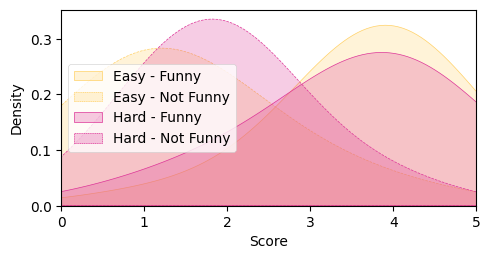

In [6]:
# Create a figure for the combined plot
plt.figure(figsize=(10, 6))

# Create a mapping from categorical responses to numeric scores (for easy dataset)
response_to_score = {
    "Strongly Disagree": 1,
    "Disagree": 2,
    "Neutral": 3,
    "Agree": 4,
    "Strongly Agree": 5
}

colors = [
    '#FFD166',
    '#DD3497',
    '#06D6A0',
    '#118AB2',
    '#ff7d00'
]

fig, ax = plt.subplots(1, 1, sharey=True)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
mpl.rcParams['patch.linewidth']=0.5 #width of the boundary of legend
fig.subplots_adjust(left=0.16, bottom=0.2, right=0.99, top=0.76, wspace=0.05, hspace=0.15) #margin of the figure
fig.set_size_inches(5, 3.5) #exact size of the figure

# Create a temporary dataframe with numeric scores for easy dataset
easy_with_scores = easy.copy()
easy_with_scores['Score'] = easy_with_scores['Response'].map(response_to_score)

# Plot for easy dataset - funny (solid line)
sns.kdeplot(data=easy_with_scores, x='Score', weights='Funny_Count', 
            color=colors[0], label='Easy - Funny', linestyle='-', ax=ax, fill=True)

# Plot for easy dataset - not funny (dashed line)
sns.kdeplot(data=easy_with_scores, x='Score', weights='NotFunny_Count', 
            color=colors[0], label='Easy - Not Funny', linestyle='--', ax=ax, fill=True)

# Plot for hard dataset - funny (solid line)
sns.kdeplot(data=hard[hard.label == "funny"], x='score', weights='count', 
            color=colors[1], label='Hard - Funny', linestyle='-', ax=ax, fill=True)


# Plot for hard dataset - not funny (dashed line)
sns.kdeplot(data=hard[hard.label != "funny"], x='score', weights='count', 
            color=colors[1], label='Hard - Not Funny', linestyle='--', ax=ax, fill=True)

plt.xlabel('Score')
ax.set_xlim(0, 5)
plt.legend()
plt.show()


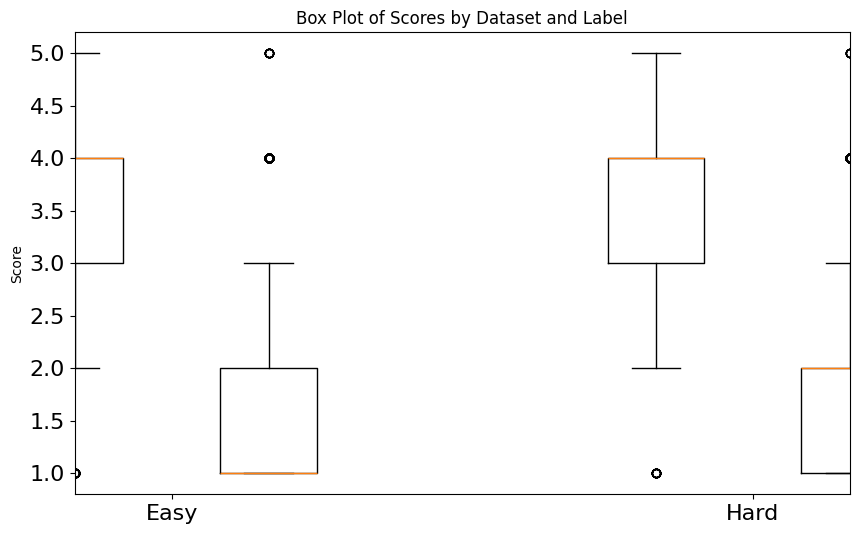

In [33]:
# Create a figure for the box plot
plt.figure(figsize=(10, 6))

# Create a mapping from categorical responses to numeric scores (for easy dataset)
response_to_score = {
    "Strongly Disagree": 1,
    "Disagree": 2,
    "Neutral": 3,
    "Agree": 4,
    "Strongly Agree": 5
}

# Create a temporary dataframe with numeric scores for easy dataset
easy_with_scores = easy.head().copy()
easy_with_scores['Score'] = easy_with_scores['Response'].map(response_to_score)

# Prepare data for box plots
# For easy dataset - funny (fix NaN handling)
easy_with_scores['Funny_Count_Clean'] = easy_with_scores['Funny_Count'].fillna(0).astype(int)
easy_funny_scores = np.repeat(easy_with_scores['Score'], easy_with_scores['Funny_Count_Clean'])

# For easy dataset - not funny (fix NaN handling)
easy_with_scores['NotFunny_Count_Clean'] = easy_with_scores['NotFunny_Count'].fillna(0).astype(int)
easy_not_funny_scores = np.repeat(easy_with_scores['Score'], easy_with_scores['NotFunny_Count_Clean'])

# For hard dataset - funny
hard = hard[hard.score!=-1]
hard_funny = hard[hard.label == "funny"]
hard_funny_scores = np.repeat(hard_funny['score'].values, hard_funny['count'].astype(int).values)

# For hard dataset - not funny
hard_not_funny = hard[hard.label != "funny"]
hard_not_funny_scores = np.repeat(hard_not_funny['score'].values, hard_not_funny['count'].astype(int).values)

# Create box plot data and positions
box_data = [easy_funny_scores, easy_not_funny_scores, hard_funny_scores, hard_not_funny_scores]
positions = [1, 2, 4, 5]  # Positions for the boxes with a gap between easy and hard clusters

# Create the box plot
plt.boxplot(box_data, positions=positions)

# Add labels and title
plt.ylabel('Score')
plt.title('Box Plot of Scores by Dataset and Label')
# plt.ylim(1, 5)
# Set x-axis ticks and labels
plt.xticks([1.5, 4.5], ['Easy', 'Hard'])  # Position labels between the boxes in each cluster
plt.xlim(1, 5)
plt.show()


In [27]:
easy.head()

,Response,Funny_Count,Funny_Percentage,NotFunny_Count,NotFunny_Percentage
0,Strongly Agree,91.0,11.757106,9.0,0.394910
1,Agree,472.0,60.981912,125.0,5.484862
2,Neutral,151.0,19.509044,231.0,10.136025
3,Disagree,22.0,2.842377,290.0,12.724879
4,Strongly Disagree,38.0,4.909561,1624.0,71.259324


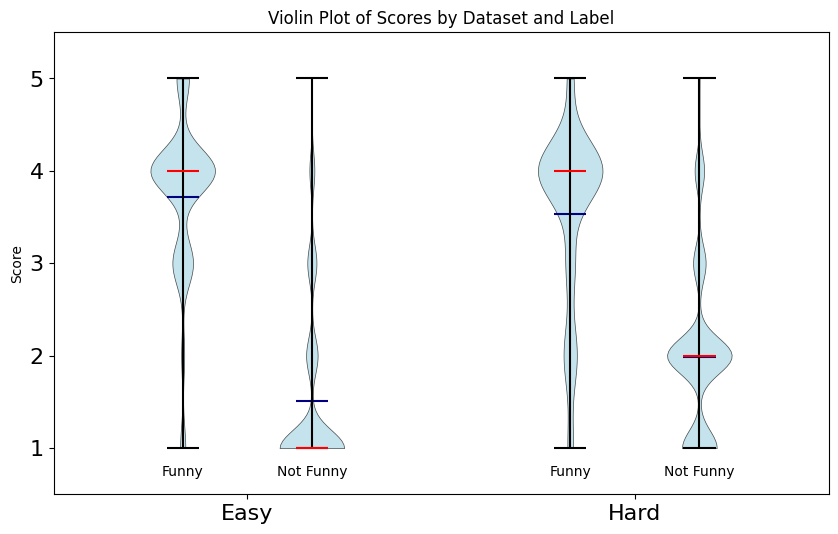

In [30]:
# Create a figure for the violin plot
plt.figure(figsize=(10, 6))

# Create a mapping from categorical responses to numeric scores (for easy dataset)
response_to_score = {
    "Strongly Disagree": 1,
    "Disagree": 2,
    "Neutral": 3,
    "Agree": 4,
    "Strongly Agree": 5
}

# Create a temporary dataframe with numeric scores for easy dataset
easy_with_scores = easy.head().copy()
easy_with_scores['Score'] = easy_with_scores['Response'].map(response_to_score)

# Prepare data for violin plots
# For easy dataset - funny (fix NaN handling)
easy_with_scores['Funny_Count_Clean'] = easy_with_scores['Funny_Count'].fillna(0).astype(int)
easy_funny_scores = np.repeat(easy_with_scores['Score'], easy_with_scores['Funny_Count_Clean'])

# For easy dataset - not funny (fix NaN handling)
easy_with_scores['NotFunny_Count_Clean'] = easy_with_scores['NotFunny_Count'].fillna(0).astype(int)
easy_not_funny_scores = np.repeat(easy_with_scores['Score'], easy_with_scores['NotFunny_Count_Clean'])

# For hard dataset - funny
hard = hard[hard.score!=-1]
hard_funny = hard[hard.label == "funny"]
hard_funny_scores = np.repeat(hard_funny['score'].values, hard_funny['count'].astype(int).values)

# For hard dataset - not funny
hard_not_funny = hard[hard.label != "funny"]
hard_not_funny_scores = np.repeat(hard_not_funny['score'].values, hard_not_funny['count'].astype(int).values)

# Create violin plot data and positions
violin_data = [easy_funny_scores, easy_not_funny_scores, hard_funny_scores, hard_not_funny_scores]
positions = [1, 2, 4, 5]  # Positions for the violins with a gap between easy and hard clusters

# Create the violin plot
parts = plt.violinplot(violin_data, positions=positions, showmeans=True, showmedians=True)

# Customize violin plot appearance
for pc in parts['bodies']:
    pc.set_facecolor('lightblue')
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)

# Customize other elements
for partname in ['cbars', 'cmins', 'cmaxes']:
    parts[partname].set_edgecolor('black')
parts['cmeans'].set_edgecolor('navy')
parts['cmedians'].set_edgecolor('red')

# Add labels and title
plt.ylabel('Score')
plt.title('Violin Plot of Scores by Dataset and Label')

# Set x-axis ticks and labels
plt.xticks([1.5, 4.5], ['Easy', 'Hard'])  # Position labels between the violins in each cluster
plt.xlim(0, 6)
plt.ylim(0.5, 5.5)  # Set y-axis limits to match the score range

# Add more detailed labels
plt.text(1, 0.7, 'Funny', ha='center')
plt.text(2, 0.7, 'Not Funny', ha='center')
plt.text(4, 0.7, 'Funny', ha='center')
plt.text(5, 0.7, 'Not Funny', ha='center')

plt.show()

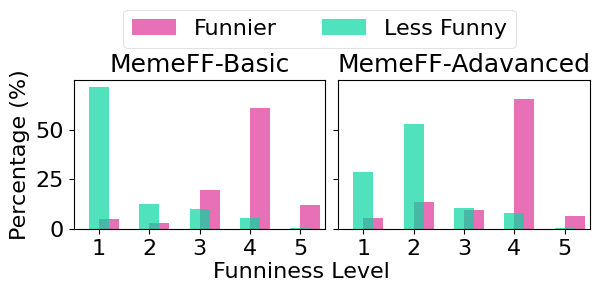

In [97]:
# Create a figure for the combined plot with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 2.8), sharey=True)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
mpl.rcParams['patch.linewidth'] = 0.5  # width of the boundary of legend
fig.subplots_adjust(left=0.12, bottom=0.2, right=0.98, top=0.73, wspace=0.05, hspace=0.15)  # margin of the figure

# Create a mapping from categorical responses to numeric scores (for easy dataset)
response_to_score = {
    "Strongly Disagree": 1,
    "Disagree": 2,
    "Neutral": 3,
    "Agree": 4,
    "Strongly Agree": 5
}

# Colors for funny and not funny
funny_color = '#DD3497'
not_funny_color = '#06D6A0'

# Create a temporary dataframe with numeric scores for easy dataset
easy_with_scores = easy.copy()
easy_with_scores['Score'] = easy_with_scores['Response'].map(response_to_score)

# Get data for easy dataset
funny_scores_easy = np.repeat(easy_with_scores['Score'], easy_with_scores['Funny_Count'])
not_funny_scores_easy = np.repeat(easy_with_scores['Score'], easy_with_scores['NotFunny_Count'])

# Get data for hard dataset
funny_scores_hard = np.repeat(hard[hard.label == "funny"]['score'].values, 
                             hard[hard.label == "funny"]['count'].astype(int).values)
not_funny_scores_hard = np.repeat(hard[hard.label != "funny"]['score'].values, 
                                 hard[hard.label != "funny"]['count'].astype(int).values)

# Plot for easy dataset (first subplot) with percentage
hist_funny_easy, bins = np.histogram(funny_scores_easy, bins=5, range=(0.5, 5.5))
hist_not_funny_easy, _ = np.histogram(not_funny_scores_easy, bins=5, range=(0.5, 5.5))
hist_funny_easy_pct = hist_funny_easy / hist_funny_easy.sum() * 100
hist_not_funny_easy_pct = hist_not_funny_easy / hist_not_funny_easy.sum() * 100

ax1.bar(np.arange(1, 6), hist_funny_easy_pct, width=0.4, alpha=0.7, color=funny_color, label='Funnier', align='edge')
ax1.bar(np.arange(1, 6), hist_not_funny_easy_pct, width=0.4, alpha=0.7, color=not_funny_color, label='Less Funny')
ax1.set_title('MemeFF-Basic', fontsize=18)
ax1.set_ylabel('Percentage (%)', fontsize=16)
ax1.set_xlim(0.5, 5.5)
ax1.set_xticks(np.arange(1, 6))

# Plot for hard dataset (second subplot) with percentage
hist_funny_hard, bins = np.histogram(funny_scores_hard, bins=5, range=(0.5, 5.5))
hist_not_funny_hard, _ = np.histogram(not_funny_scores_hard, bins=5, range=(0.5, 5.5))
hist_funny_hard_pct = hist_funny_hard / hist_funny_hard.sum() * 100
hist_not_funny_hard_pct = hist_not_funny_hard / hist_not_funny_hard.sum() * 100

ax2.bar(np.arange(1, 6), hist_funny_hard_pct, width=0.4, alpha=0.7, color=funny_color, label='Funnier', align='edge')
ax2.bar(np.arange(1, 6), hist_not_funny_hard_pct, width=0.4, alpha=0.7, color=not_funny_color, label='Less Funny')
ax2.set_title('MemeFF-Adavanced', fontsize=18)
ax2.set_xlim(0.5, 5.5)
ax2.set_xticks(np.arange(1, 6))

# Add arrows to x-axis for both plots
# arrow_props = dict(arrowstyle='->', linewidth=.5, color='black')
# ax1.annotate('', xy=(5.7, 0), xytext=(0.5, 0), 
#              arrowprops=arrow_props, annotation_clip=False)
# ax1.annotate('funnier', xy=(5.8, 0), xytext=(5.8, 0), 
#              fontsize=14, ha='left', va='center')

# ax2.annotate('', xy=(5.7, 0), xytext=(0.5, 0), 
#              arrowprops=arrow_props, annotation_clip=False)
# ax2.annotate('funnier', xy=(5.8, 0), xytext=(5.8, 0), 
#              fontsize=14, ha='left', va='center')

ax1.legend(fontsize=16, bbox_to_anchor = (1.8, 1.55), ncol = 2)
fig.supxlabel("Funniness Level", fontsize=16)
plt.savefig(f'{root_dir}/figures/data_distribution.pdf')
